In [137]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Calcul de l'horizon
pour corriger l'irradiation solaire de l'ombre des montagnes

## Get the data
Shuttle Radar Topography Mission (SRTM) free digital elevation 

https://www2.jpl.nasa.gov/srtm/  
https://earthexplorer.usgs.gov/

## install GDAL
https://gdal.gloobe.org/install.html  

    sudo add-apt-repository ppa:ubuntugis/ppa && sudo apt-get update
    sudo apt-get install gdal-bin
    ...

In [2]:
import gdal

In [3]:
filename = 'elevation_data/n45_e005_1arc_v3.tif'

In [4]:
dataset = gdal.Open(filename)

In [5]:
# see   http://www.gdal.org/gdal_tutorial.html

In [6]:
dataset.RasterCount

1

In [7]:
dataset.RasterXSize

3601

In [8]:
print( 'Projection is ',dataset.GetProjection() )

Projection is  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [9]:
geotransform = dataset.GetGeoTransform()
if not geotransform is None:
    print( 'Origin = (',geotransform[0], ',',geotransform[3],')' )
    print( 'Pixel Size = (',geotransform[1], ',',geotransform[5],')' )

Origin = ( 4.9998611111111115 , 46.000138888888884 )
Pixel Size = ( 0.0002777777777777778 , -0.0002777777777777778 )


In [10]:
geotransform

(4.9998611111111115,
 0.0002777777777777778,
 0.0,
 46.000138888888884,
 0.0,
 -0.0002777777777777778)

In [11]:
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()

In [12]:
print( 'Band Type=',gdal.GetDataTypeName(band.DataType)  )

Band Type= Int16


In [13]:
Bmin = band.GetMinimum()
Bmax = band.GetMaximum()
print(Bmin, Bmax)

(Bmin,Bmax) = band.ComputeRasterMinMax(1)
print(Bmin, Bmax)

None None
134.0 2838.0


In [14]:
band.GetOverviewCount() 

0

In [138]:
elevation = band.ReadAsArray()

print(elevation.shape)
print( elevation )

(3601, 3601)
[[ 284  283  282 ...,  473  473  473]
 [ 286  285  283 ...,  473  473  473]
 [ 284  283  281 ...,  475  474  474]
 ..., 
 [ 173  175  175 ..., 2405 2406 2415]
 [ 173  174  176 ..., 2395 2400 2402]
 [ 174  175  175 ..., 2383 2387 2391]]


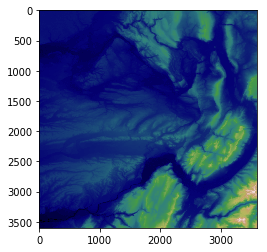

In [17]:
plt.imshow(elevation, cmap='gist_earth')
plt.show()

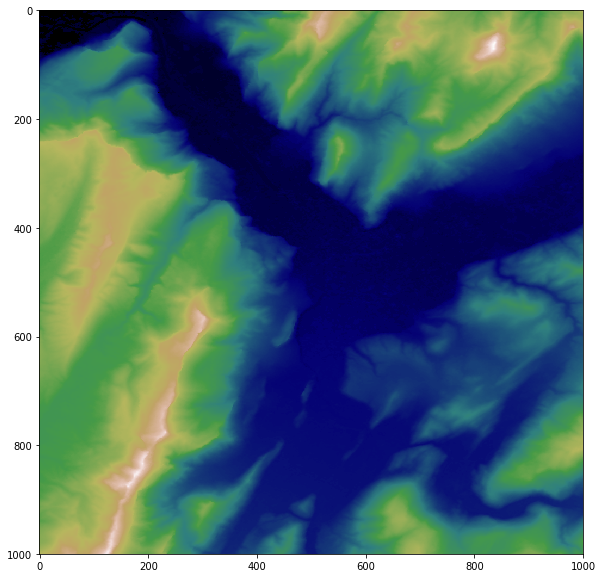

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(elevation[ 2500:3500, 2000:3000], cmap='gist_earth')
plt.show()

## Horizon

In [139]:
Rterre =  6371.009 # km

In [141]:
geotransform = dataset.GetGeoTransform()

mapZeroGPS = ( geotransform[0], geotransform[3] )
pixelSize =  ( geotransform[1], geotransform[5] )

mapSize = ( dataset.RasterXSize, dataset.RasterYSize )

In [142]:
pixelSize  # deg

(0.0002777777777777778, -0.0002777777777777778)

In [143]:
mapZeroGPS # def

(4.9998611111111115, 46.000138888888884)

In [144]:
mapSize

(3601, 3601)

In [145]:
imgsize_deg = 0.0002777777777777778*3601

In [147]:
imgsize_km = imgsize_deg * Rterre*np.pi/180

print( imgsize_km )

111.22597124744813


In [29]:
pixelsize_km = pixelSize[0]*Rterre*np.pi/180
print( 'résolution: %i m' % (pixelsize_km*1000)   )

résolution: 30 m


In [148]:
# Centre
GPScoords = 5.7103223, 45.1973288

In [31]:
mapZeroGPS = np.array( mapZeroGPS )
coordsCentreGPS = np.array( GPScoords )
pixelSize = np.array( pixelSize )

In [32]:
coordsCentrePx = np.round( (coordsCentreGPS - mapZeroGPS)/pixelSize )
print( coordsCentrePx )

[ 2558.  2890.]


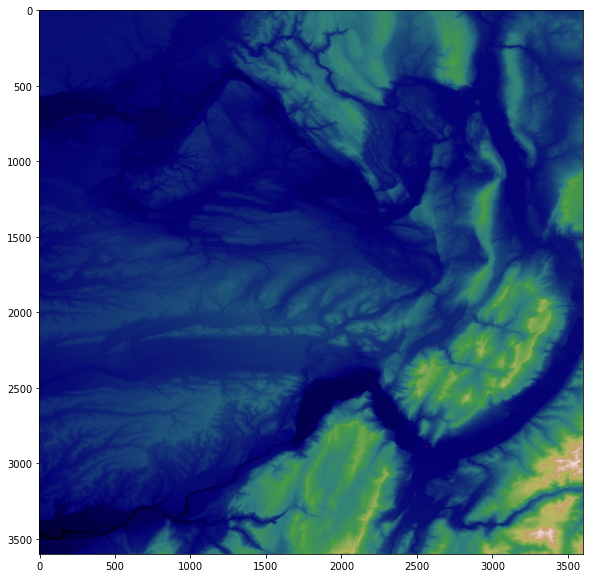

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(elevation, cmap='gist_earth')
plt.plot(coordsCentrePx[0], coordsCentrePx[1], ',r' )
plt.show()

In [130]:
xyres = pixelSize *Rterre*np.pi/180  *1000  # m
print( xyres )

[ 30.88752326 -30.88752326]


In [51]:
mY, mX = np.mgrid[ 0:mapSize[0], 0:mapSize[1] ]

In [149]:
Distance = np.sqrt( (mX - coordsCentrePx[0] )**2 + (mY-coordsCentrePx[1])**2 )*xyres[0]

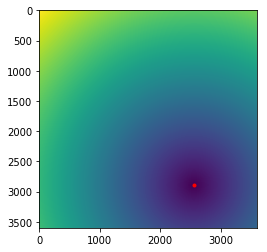

In [150]:
plt.imshow(Distance)
plt.plot(coordsCentrePx[0], coordsCentrePx[1], '.r' )

In [152]:
Azimuth =  np.arctan2(  mX-coordsCentrePx[0], mY-coordsCentrePx[1] )*180/np.pi  # zero au sud

k = 0.5
Azimuth = np.round( Azimuth/k )*k

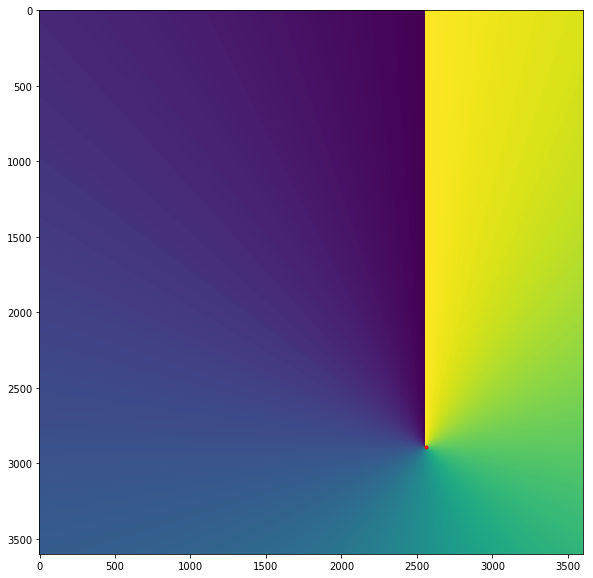

In [153]:
plt.figure(figsize=(10, 10))
plt.imshow(Azimuth)
plt.plot(coordsCentrePx[0], coordsCentrePx[1], '.r' );

In [154]:
altitudeCentre = elevation[ int(coordsCentrePx[1]), int(coordsCentrePx[0]) ] + 10
print(altitudeCentre)

219


In [155]:
Horizon = np.arctan2( elevation - altitudeCentre, Distance )*180/np.pi

In [156]:
Horizon.max()

15.912218154641552

In [157]:
Horizon.min()

-90.0

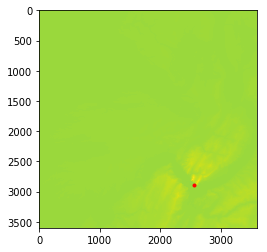

In [159]:
plt.imshow(Horizon)
plt.plot(coordsCentrePx[0], coordsCentrePx[1], '.r' )

In [160]:
Horizon

array([[ 0.03124107,  0.03076572,  0.0302902 , ...,  0.15340206,
         0.15338514,  0.15336822],
       [ 0.03220858,  0.0317333 ,  0.03077698, ...,  0.15344907,
         0.15343214,  0.15341519],
       [ 0.03125319,  0.03077766,  0.02982098, ...,  0.15470473,
         0.1540834 ,  0.15406638],
       ..., 
       [-0.03214906, -0.03076245, -0.03077362, ...,  3.21966316,
         3.21902203,  3.23012361],
       [-0.03214583, -0.03145843, -0.0300712 , ...,  3.20353476,
         3.20877812,  3.20961233],
       [-0.03144384, -0.03075625, -0.03076742, ...,  3.18448182,
         3.1882689 ,  3.19205035]])

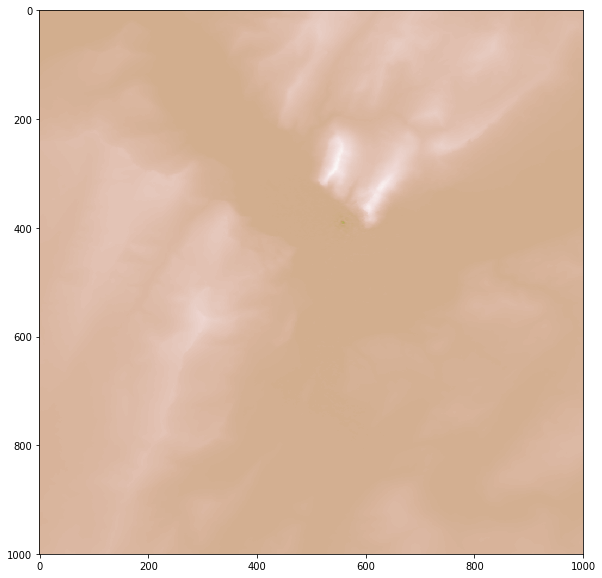

In [158]:
plt.figure(figsize=(10, 10))
plt.imshow(Horizon[ 2500:3500, 2000:3000], cmap='gist_earth')
plt.show()

In [161]:
azimuth_span = np.unique( Azimuth )

print( len( azimuth_span ) )

721


In [162]:
horizon_profil = []
for az in azimuth_span:
    h = Horizon[ Azimuth == az ].max()
    horizon_profil.append( h )

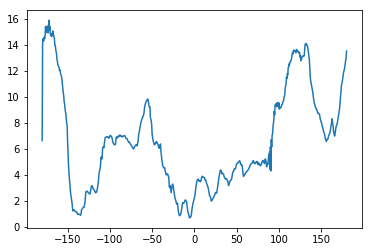

In [163]:
plt.plot( azimuth_span, horizon_profil  )

### Save to file

In [174]:
horizon_data = np.array( [ azimuth_span, horizon_profil  ] ).T

In [175]:
np.savetxt('horizon.csv', horizon_data, fmt='%3.4f', delimiter=', ' )

In [176]:
horizon_data

array([[-180.        ,    6.64507163],
       [-179.5       ,   14.01107138],
       [-179.        ,   14.49237379],
       ..., 
       [ 179.        ,   12.80841866],
       [ 179.5       ,   13.05349103],
       [ 180.        ,   13.54037349]])

### To Do

- Tracer sur la carte la position de l'horizon
- Assembler plusieurs images
